In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Normalization
import seaborn as sns

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model_year', 'origin']

data = pd.read_csv(url, names=column_names,
                    na_values='?', comment='\t',
                    sep=' ', skipinitialspace=True)


In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
print(data.isna().sum())
data = data.dropna()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [7]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)

/Users/binilkuriachan/anaconda3/envs/ail-411-env/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


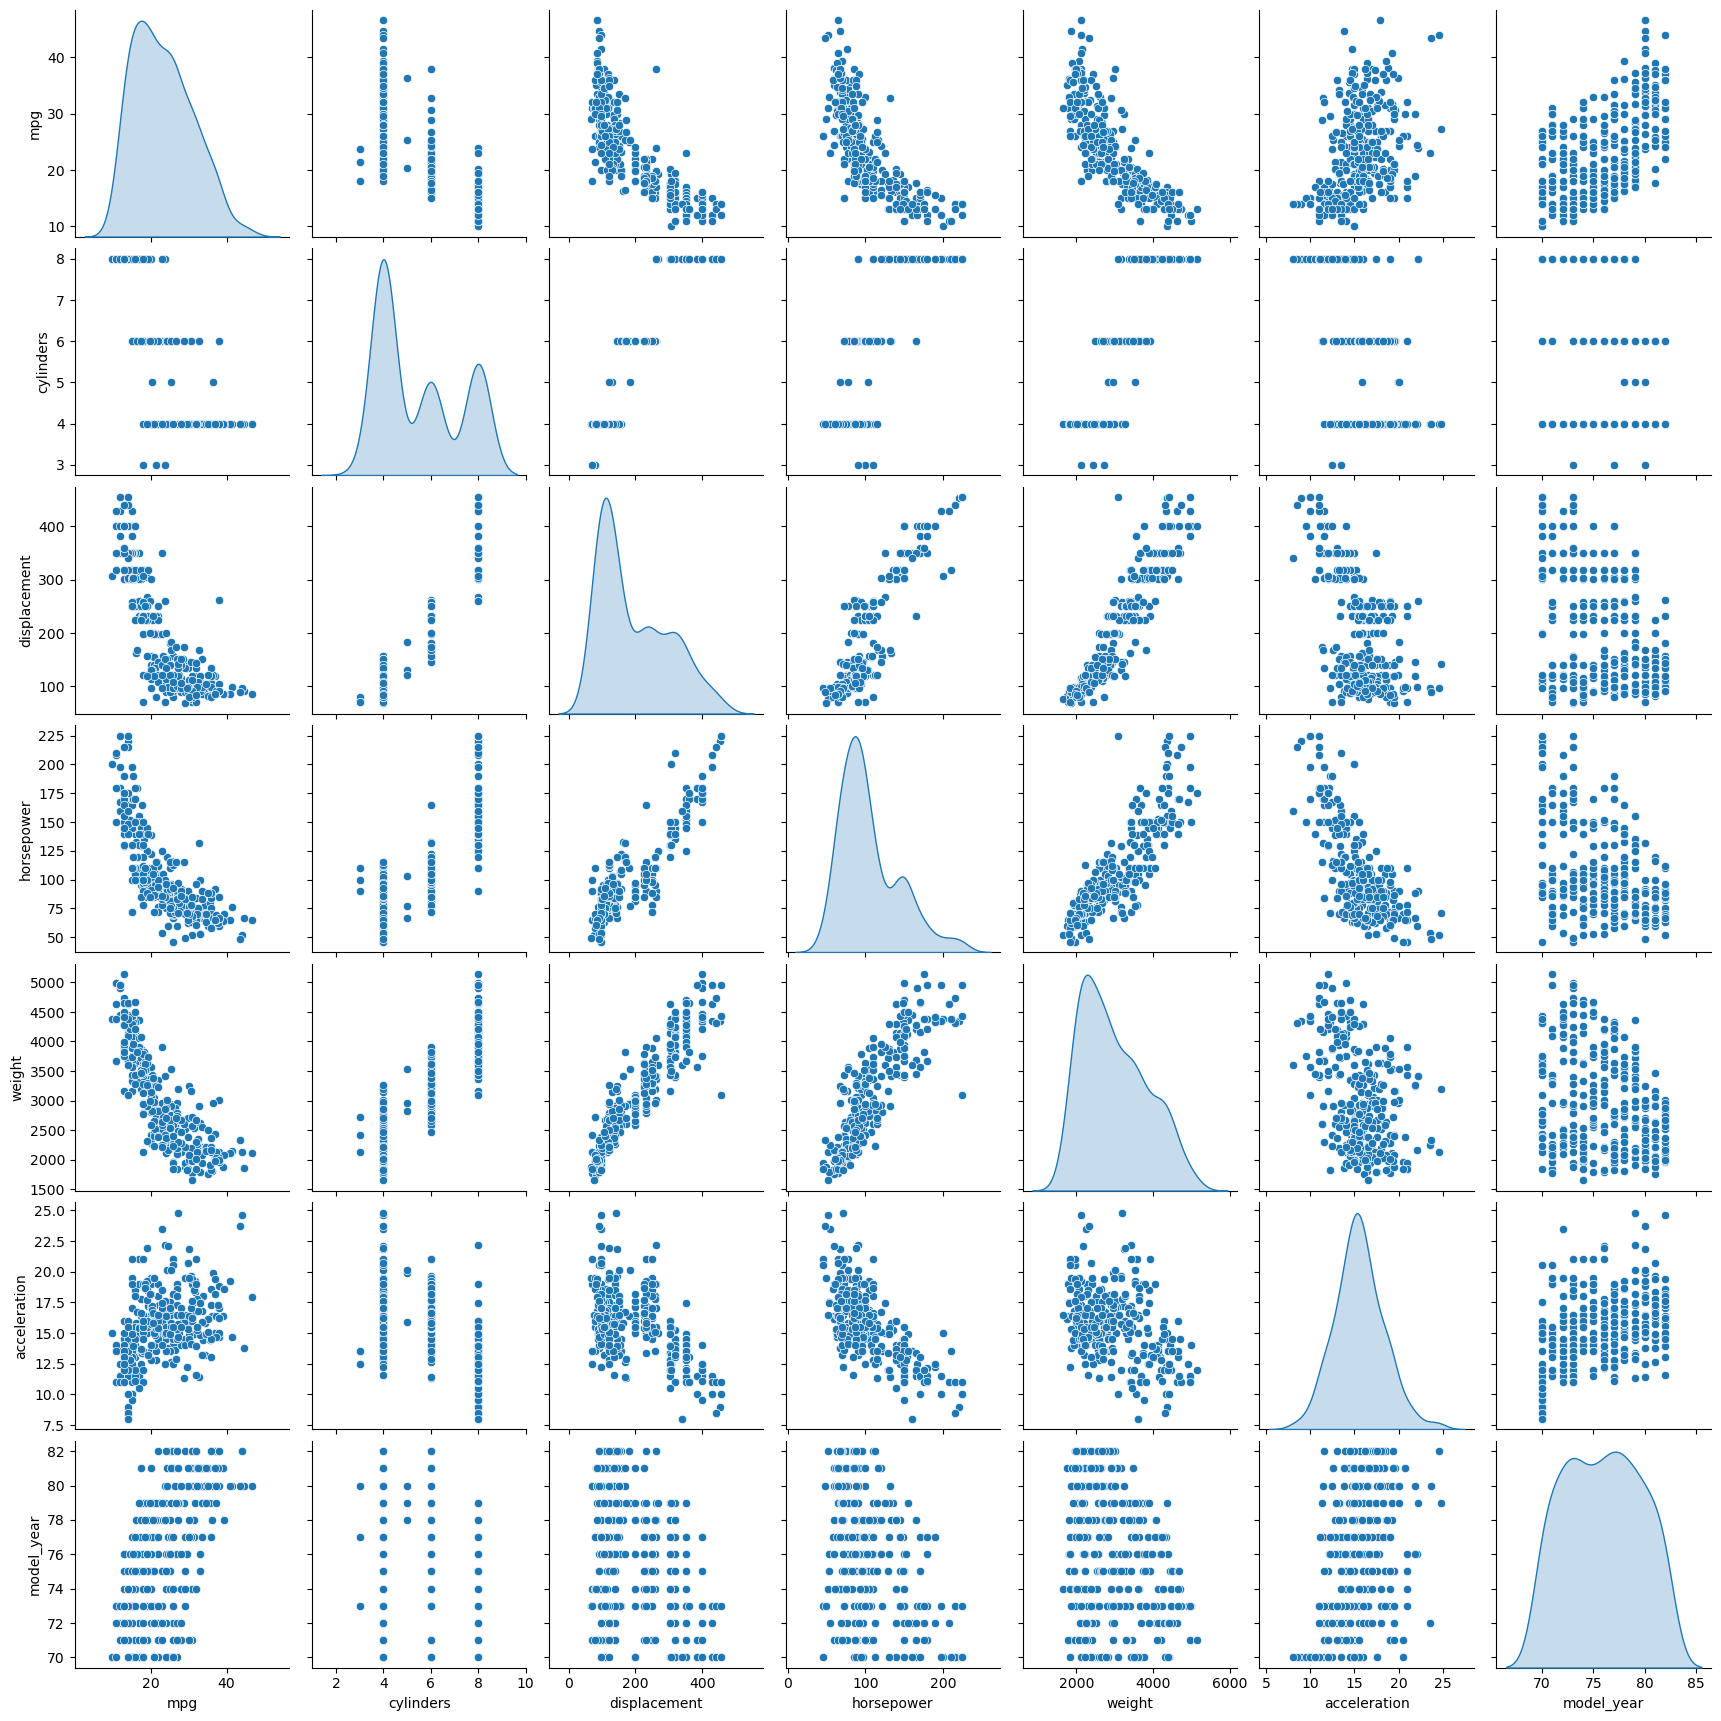

In [8]:
sns.pairplot(train_dataset[['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model_year']], diag_kind='kde')

In [9]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
mpg,23.310510,7.728652
cylinders,5.477707,1.699788
displacement,195.318471,104.331589
horsepower,104.869427,38.096214
weight,2990.251592,843.898596
acceleration,15.559236,2.789230
model_year,75.898089,3.675642
origin,1.573248,0.800988


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy() 

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')


In [11]:
#Normalize
data_normalizer = Normalization(axis=1)
data_normalizer.adapt(np.array(train_features))


In [15]:
model = tf.keras.Sequential([
                      data_normalizer,
                      tf.keras.layers.Dense(64,  activation='relu'),
                      tf.keras.layers.Dense(32,  activation='relu'),
                      tf.keras.layers.Dense(1,  activation=None)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 7)                 15        
 on)                                                             
                                                                 
 dense_9 (Dense)             (None, 64)                512       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2640 (10.32 KB)
Trainable params: 2625 (10.25 KB)
Non-trainable params: 15 (64.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
history = model.fit(x=train_features,y=train_labels, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 2s 46ms/step - loss: 598.7834 - val_loss: 619.5065
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 588.9645 - val_loss: 608.0610
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 578.3279 - val_loss: 597.1252
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 568.0391 - val_loss: 585.6349
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 556.9459 - val_loss: 572.1325
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 544.0876 - val_loss: 558.2560
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 531.0710 - val_loss: 542.6690
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 516.6717 - val_loss: 526.9391
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 501.3387 - val_loss: 510.8784
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 486.8417 - val_los

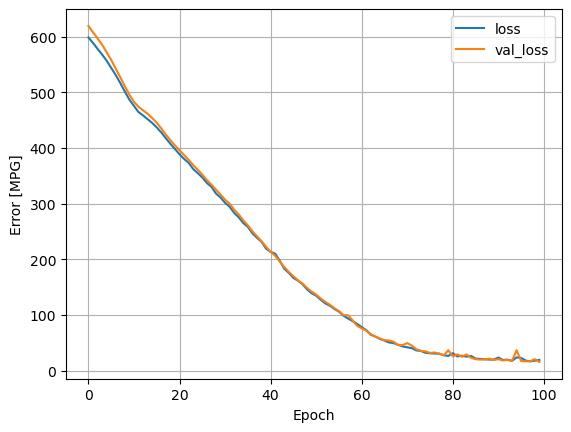

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

3/3 [==============================] - 0s 76ms/step


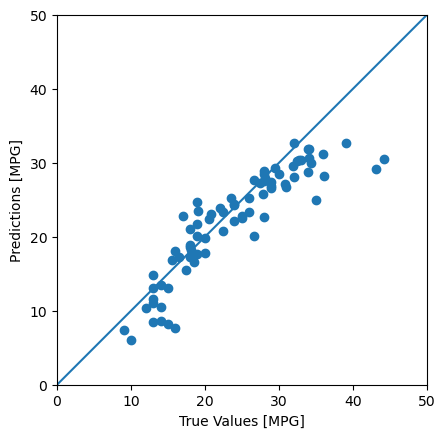

In [19]:
y_pred = model.predict(test_features).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)


Text(0, 0.5, 'Count')

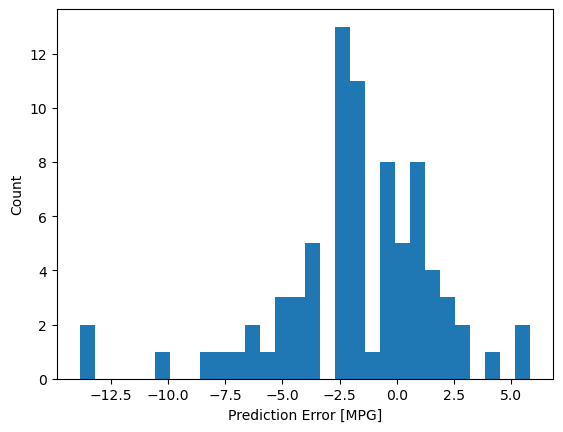

In [20]:
error = y_pred - test_labels
plt.hist(error, bins=30)
plt.xlabel('Prediction Error [MPG]')
plt.ylabel('Count')